<a href="https://colab.research.google.com/github/MALIPEDDIJAHNAVI/fml/blob/main/Naive_Bayes_On_Adult_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
data=pd.read_csv("/content/archive (8).zip")

In [36]:
data.shape

(48842, 15)

In [37]:
data.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [38]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [39]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Assigning Input and Output

In [40]:
X = data.drop(['income'], axis=1)

y = data['income']

Converting Strings

In [41]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["workclass"]= le.fit_transform(data['workclass'])
X["education"] = le.fit_transform(data['education'])
X["marital-status"] = le.fit_transform(data['marital-status'])
X["occupation"] = le.fit_transform(data['occupation'])
X["relationship"] = le.fit_transform(data['relationship'])
X["race"] = le.fit_transform(data['race'])
X["gender"] = le.fit_transform(data['gender'])
X["native-country"] = le.fit_transform(data['native-country'])

Splitting of data as Train and Test data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

Normalizing 

In [43]:
cols = X_train.columns

In [44]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [46]:
X_test = pd.DataFrame(X_test, columns=[cols])


Impporting Required libraries for Naive Bayes Algorithm

In [47]:
from sklearn.naive_bayes import GaussianNB


Initializing Model

In [48]:
gnb = GaussianNB()


Fitting the Model

In [49]:
gnb.fit(X_train, y_train)


GaussianNB()

In [50]:
y_pred = gnb.predict(X_test)


Confusion Matrix

In [51]:

cm=confusion_matrix(y_test,y_pred)

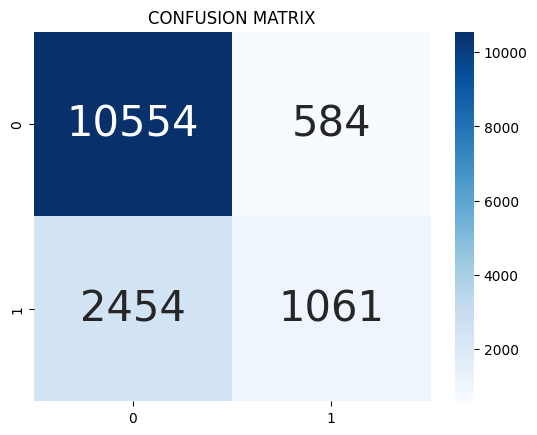

In [52]:
import seaborn as sns
ax=plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('CONFUSION MATRIX')
plt.show()
